## Notebook for data viz

To explore the features and targets

In [ ]:
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

os.chdir('..') ; sys.path.append(os.getcwd())
# sys.path.append('../..')

print(sys.path, os.getcwd())

## Loading data

In [2]:
train_path = 'data/Train/train_dataset.csv'
# train_path = 'data/Toy/db_toy.csv'

train_df = pd.read_csv(train_path, sep=',').sample(frac=0.1)
# train_labels = train_df.loc[:, ['latitude', 'longitude']]

# train_df.drop(['latitude', 'longitude'], axis=1, inplace=True)
print(train_df.shape)

(1107233, 25)


In [17]:
from utils.plot_map import PlotMap
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [6]:
PlotMap(train_labels)

NameError: name 'train_labels' is not defined

In [16]:
df_bs['latitude'] = df_bs['lat']
df_bs['longitude'] = df_bs['lng']
PlotMap(df_bs[['latitude', 'longitude']])

## Statistics and types   

In [12]:
train_df.describe()

,Unnamed: 0,did,time_ux,time_ux_client,speed,altitude,nb_satellites,radius,seqnumber,nseq,rssi,bsid,snr,freq
count,1.333141e+07,1.333141e+07,1.333141e+07,1.333110e+07,1.044412e+07,0.0,0.0,2.286515e+06,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07
mean,8.229054e+06,4.642411e+06,1.524300e+12,1.524300e+12,6.049486e+00,NaN,NaN,6.592456e+01,1.918081e+03,2.241191e-01,-1.248060e+02,5.587256e+03,2.022780e+01,8.681276e+08
std,4.751084e+06,1.795972e+06,4.802829e+09,4.802721e+09,1.712878e+01,NaN,NaN,8.713133e+01,1.231801e+03,5.693585e-01,1.035894e+01,4.755207e+03,1.082118e+01,4.863133e+04
min,0.000000e+00,8.624500e+04,1.514765e+12,1.514764e+12,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.660000e+02,9.310000e+02,-8.200000e-01,8.680341e+08
25%,4.114669e+06,3.595222e+06,1.520346e+12,1.520346e+12,0.000000e+00,NaN,NaN,0.000000e+00,7.970000e+02,0.000000e+00,-1.320000e+02,2.790000e+03,1.250000e+01,8.680889e+08
50%,8.228712e+06,5.135181e+06,1.525278e+12,1.525278e+12,0.000000e+00,NaN,NaN,0.000000e+00,1.783000e+03,0.000000e+00,-1.260000e+02,3.559000e+03,1.774000e+01,8.681274e+08
75%,1.234409e+07,5.144027e+06,1.528407e+12,1.528407e+12,2.000000e+00,NaN,NaN,1.130000e+02,3.042000e+03,0.000000e+00,-1.190000e+02,8.364000e+03,2.569000e+01,8.681674e+08
max,1.645853e+07,1.332362e+07,1.531267e+12,1.531267e+12,2.550000e+02,NaN,NaN,1.438000e+03,4.095000e+03,2.000000e+00,-5.000000e+01,3.523200e+04,1.008700e+02,8.682260e+08


In [78]:
train_labels.nunique()

latitude     75228
longitude    68977
dtype: int64

In [14]:
print(train_df.shape)
train_df.nunique()

(13331410, 22)


Unnamed: 0        13331410
messageid          2298059
did                  13524
did_hex              13524
time_msg           2111451
time_ux            2111451
time_ux_client     2110337
motion                   2
speed                  252
altitude                 0
nb_satellites            0
data_type                5
radius                 213
datepart               191
seqnumber             4096
dtid                    32
nseq                     3
rssi                   117
bsid_hex               159
bsid                   159
snr                   8701
freq                174892
dtype: int64

*Note*:  `time_msg = datetime.fromtimestamp(time_ux/1e3)`


#### Descriptions of columns

|Column Name| Type |Description|
|-----------|------|-----------|
| Unamed: 0    | __   | row ID |
| messageid | string | identificator for the messages|
|did | int | identification of devices (cellphones)|
|dtid | string | identification of `dt` ?|
| did_hex | ordinal | same as `did` in hexadecimal format | 
| time_msg | datetime | date and time of message (when sent from antenna?) |
| time_ux | int | same as `time_msg` in format ux timestamp|
| time_ux_client | int | ux timestamp of when messages has been received by client |
| motion | bool | weather (receiver) is moving or not, lot of NaN | 
| speed | float | speed of the receiver |
| altitude | __ | all values are NaN |
| nb_satellites | __ | all values are NaN |
| data_type | categorical | type of transmission? |
| radius | float | ? |
| date_part | date | date of (time_msg or time_ux?) |
| seqnumber | int | ? |
| nseq | int | number of sequences ? |
| rssi | float | ? |
|bsid{_hex} | int {string} | id of transmitting balises | 
| snr | float | ? |
| freq | float | frequency of (waves? nb of messages?) |






## Visualization

In [4]:
import seaborn as sns

sns.set()

0.000% of missing values


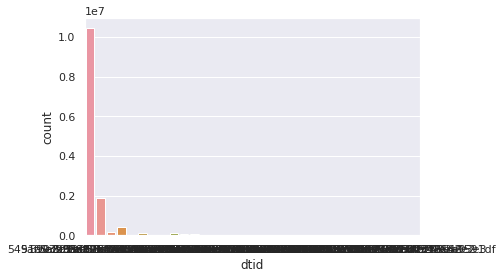

In [6]:
print('{:.3f}% of missing values'.format(train_df['dtid'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['dtid'].dropna())

0.000% of missing values


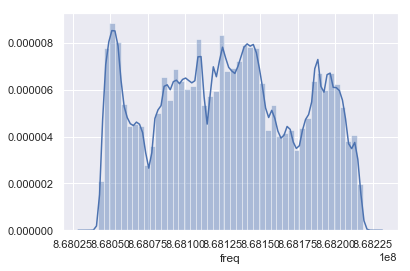

In [75]:
print('{:.3f}% of missing values'.format(train_df['freq'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['freq'].dropna())

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


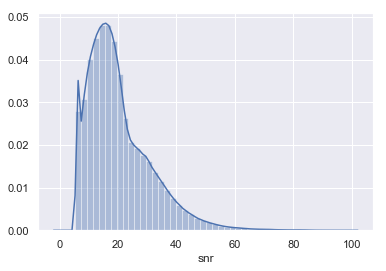

In [74]:
print('{:.3f}% of missing values'.format(train_df['snr'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['snr'].dropna())

0.000% of missing values


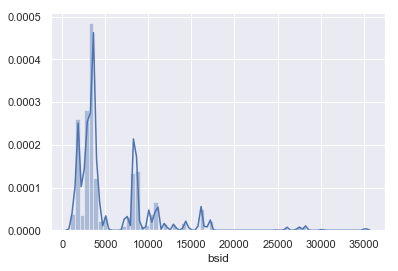

In [72]:
print('{:.3f}% of missing values'.format(train_df['bsid'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['bsid'].dropna(), bins=64)

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


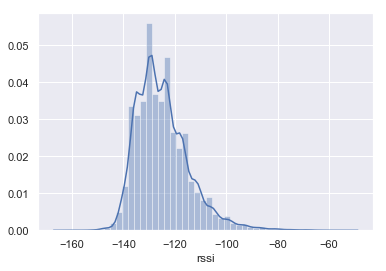

In [70]:
print('{:.3f}% of missing values'.format(train_df['rssi'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['rssi'].dropna())

0.000% of missing values


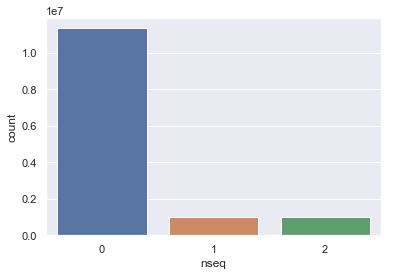

In [68]:
print('{:.3f}% of missing values'.format(train_df['nseq'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['nseq'].fillna('nan'))

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


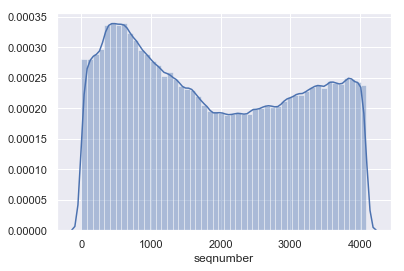

In [64]:
print('{:.3f}% of missing values'.format(train_df['seqnumber'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['seqnumber'].dropna())

82.849% of missing values


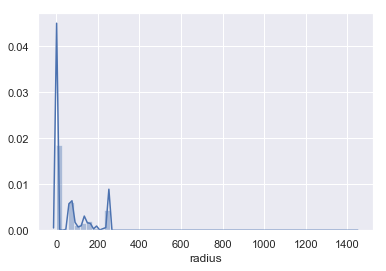

In [57]:
print('{:.3f}% of missing values'.format(train_df['radius'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['radius'].dropna()) # or fillna(-1)?

21.658% of missing values


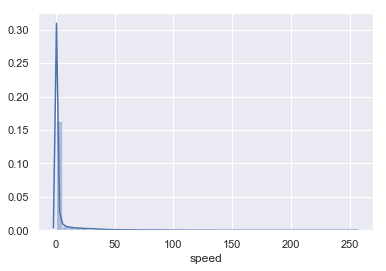

In [56]:
print('{:.3f}% of missing values'.format(train_df['speed'].isna().sum() / train_df.shape[0] * 100 ))
sns.distplot(train_df['speed'].dropna()) # or fillna(-1)

21.658% of missing values


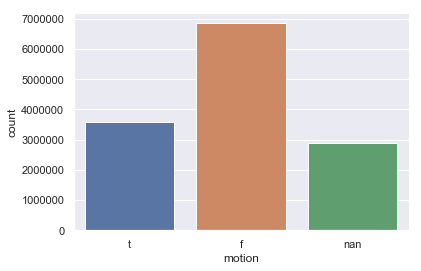

In [58]:
print('{:.3f}% of missing values'.format(train_df['motion'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['motion'].fillna('nan'))

0.000% of missing values


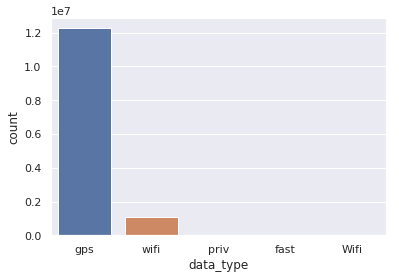

In [5]:
print('{:.3f}% of missing values'.format(train_df['data_type'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['data_type'].fillna('nan'))

ValueError: max must be larger than min in range parameter.

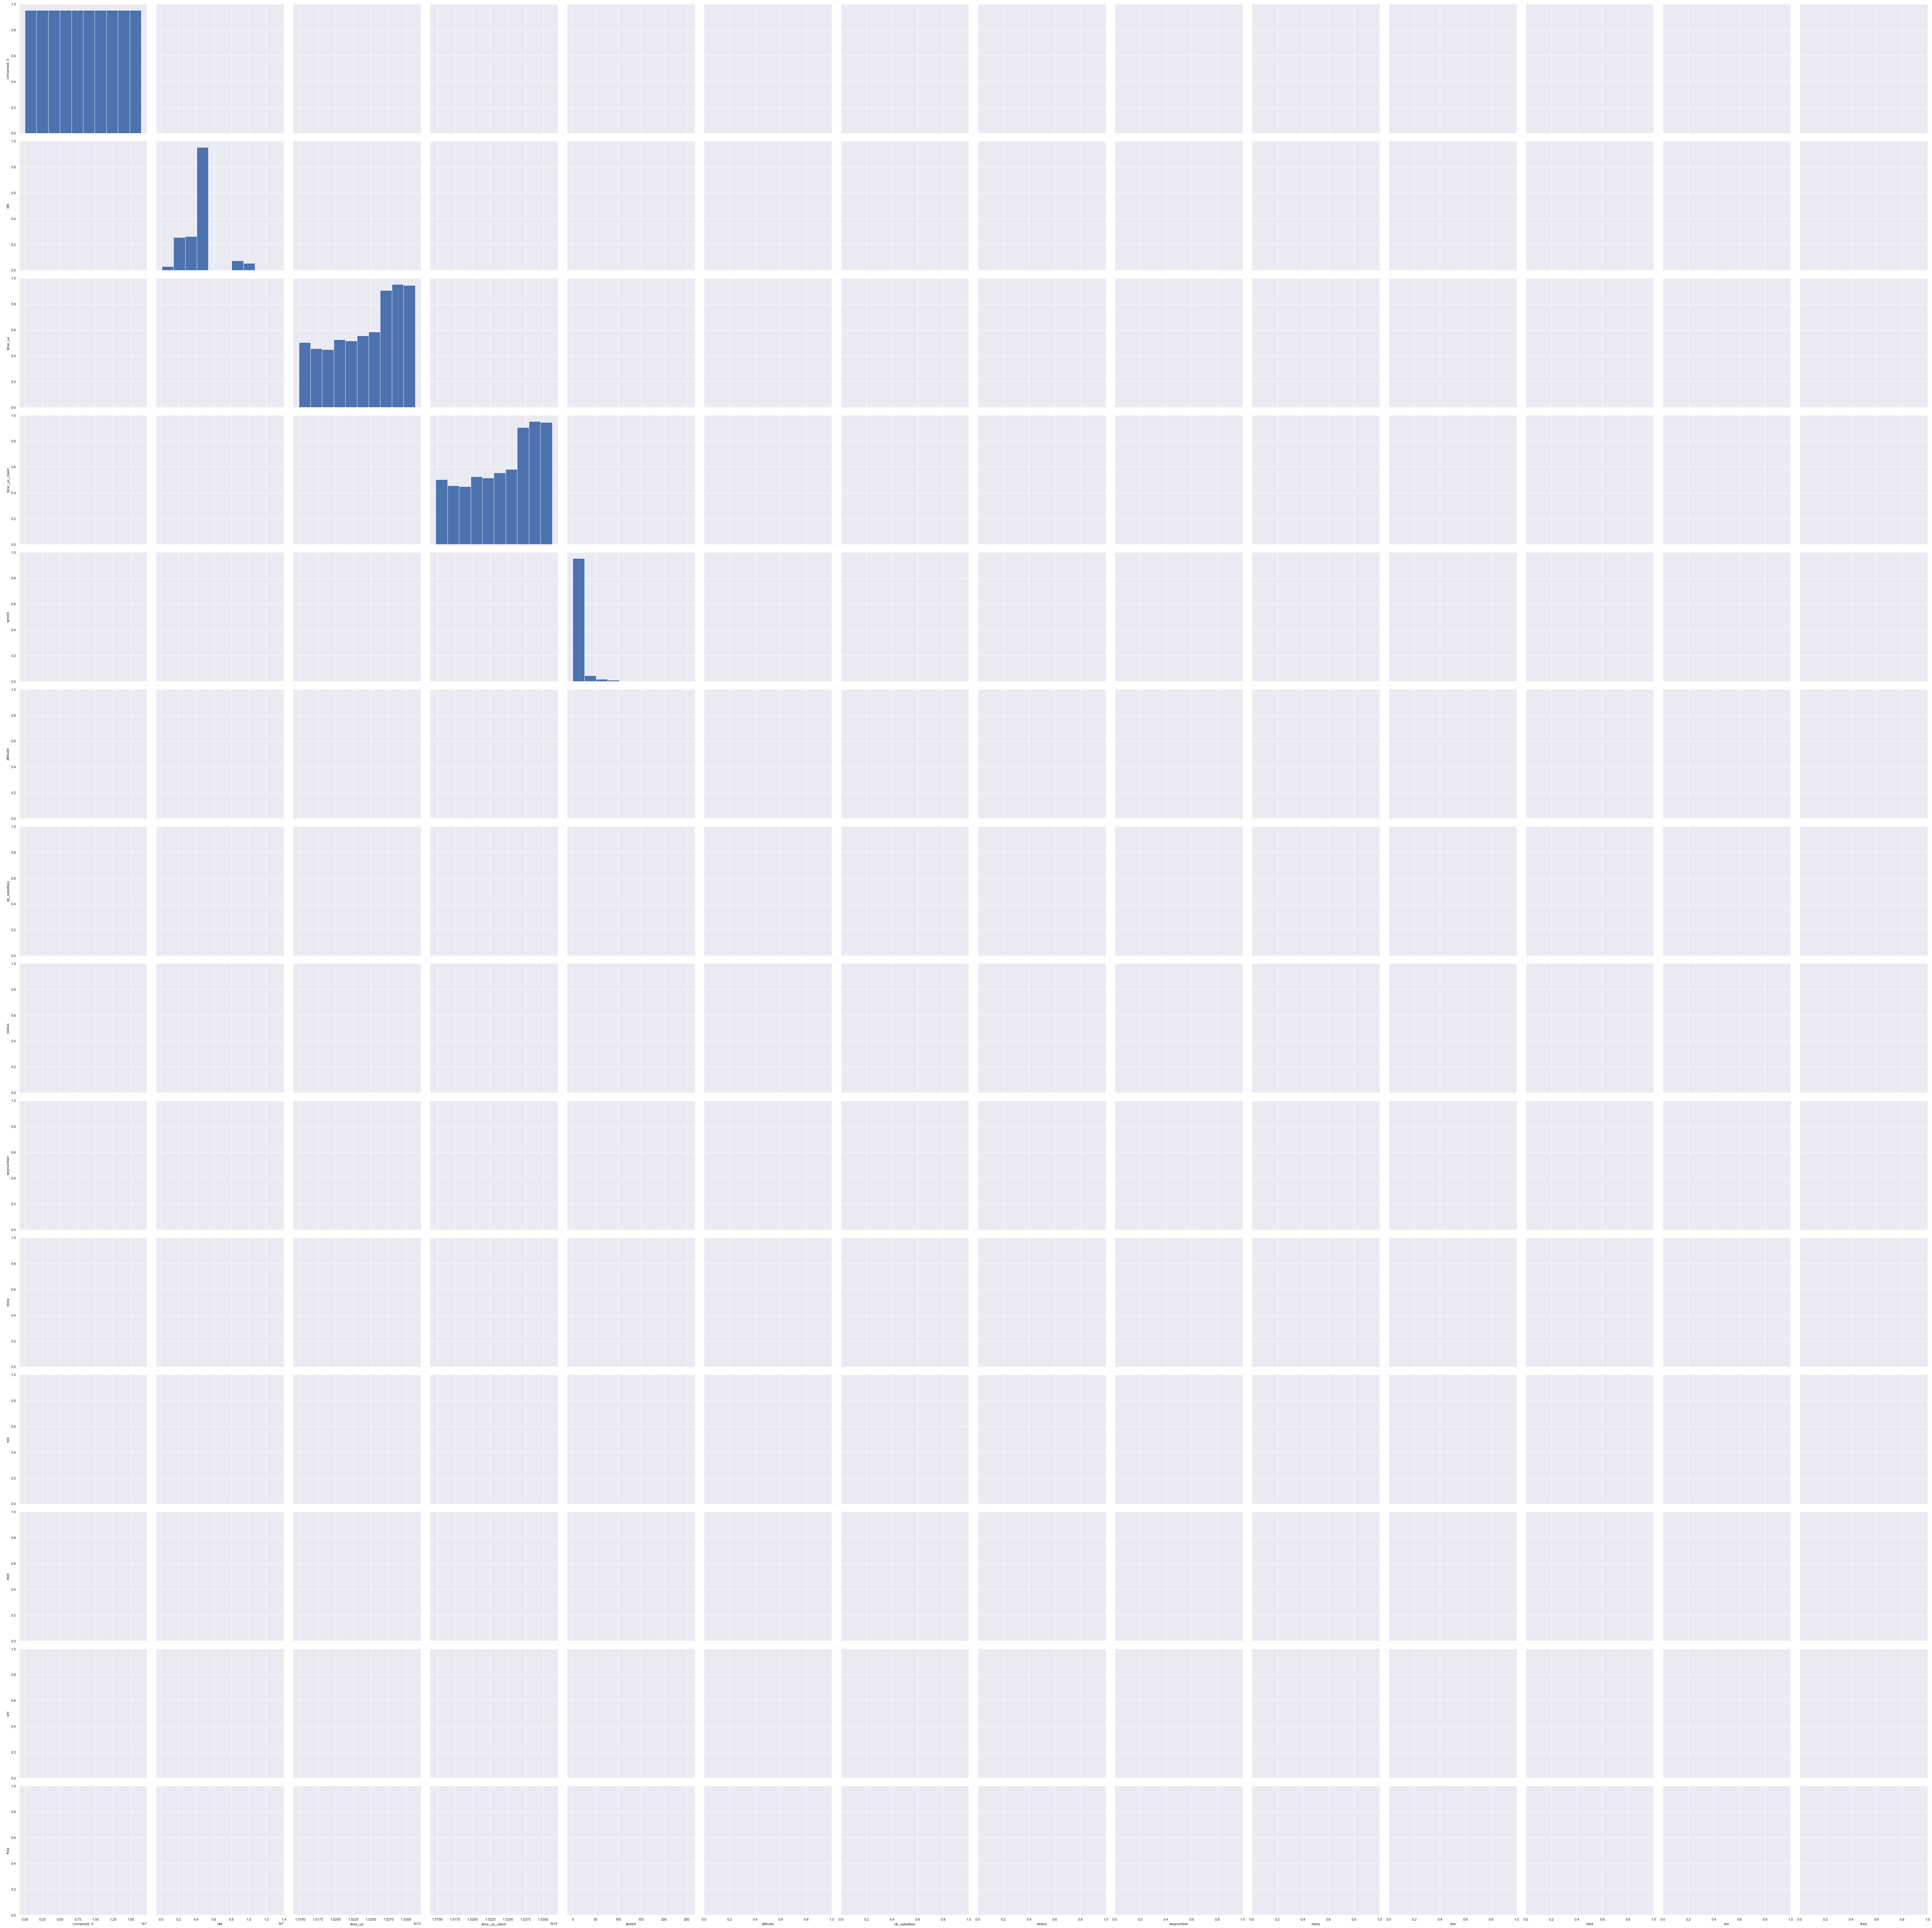

In [11]:
sns.pairplot(train_df, kind='scatter' ,dropna=True, height=6)

## Checking RSSI parameters


$$ RSSI_{received} = RSSI_{sent} - 10 \times n \times log(\frac{d}{d_0}) + err $$ where $d$ is the distance from the message to a base station, and $n$ and $d_0$ are different for each antenna

In [7]:
rssi_path = 'data/rssi_params.csv'
df_params = pd.read_csv(rssi_path, sep=';').drop('Unnamed: 0', axis=1)

In [8]:
df_params.head()

,bsid,resultat_optims
0,8245,fun: 280.8970654587115\n hess_inv: array...
1,16082,fun: 375.5156537188015\n hess_inv: array...
2,3562,fun: 285.70718574616427\n hess_inv: arra...
3,14280,fun: 320.14874940035554\n hess_inv: arra...
4,1743,fun: 327.22871085930774\n hess_inv: arra...


In [12]:
df_params.iloc[0, 1]

['fun: 280.8970654587115',
 ' hess_inv: array([[8.68783211e-05, 4.54994104e+00],',
 '       [4.54994104e+00, 1.35445141e+06]])',
 '      jac: array([ 4.36382534e+02, -5.52368164e-03])',
 "  message: 'Maximum number of iterations has been exceeded.'",
 '     nfev: 140',
 '      nit: 30',
 '     njev: 35',
 '   status: 1',
 '  success: False',
 '        x: array([-1.47069615e+00,  2.01200493e+04])']

In [11]:
df_params['resultat_optims'] = df_params['resultat_optims'].apply(lambda s: s.strip().split('\n'))

df_params.head()                                                                  

,bsid,resultat_optims
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8...."
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2...."
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1..."
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4..."
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ..."


In [25]:
df_params['resultat_optims'][1][10].strip()#.replace('x: array([', '').replace('])', '').split(',')

'x: array([-1.26660857e+00,  7.63637274e+04])'

In [32]:
df_params['n_d0'] = df_params['resultat_optims']\
    .apply(lambda l: l[10].strip().replace('x: array([', '').replace('])', '').split(','))
df_params.head()

,bsid,resultat_optims,n_d0
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8....","[-1.47069615e+00, 2.01200493e+04]"
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2....","[-1.26660857e+00, 7.63637274e+04]"
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1...","[-1.17931016e+00, 7.70912305e+04]"
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4...","[-1.34013661e+00, 4.53698591e+04]"
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ...","[-1.18933852e+00, 6.91214385e+04]"


In [33]:
df_params['n'] = df_params['n_d0'].apply(lambda l: float(l[0]))
df_params['d0'] = df_params['n_d0'].apply(lambda l: float(l[1]))

df_params.head()


,bsid,resultat_optims,n_d0,n,d0
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8....","[-1.47069615e+00, 2.01200493e+04]",-1.470696,20120.0493
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2....","[-1.26660857e+00, 7.63637274e+04]",-1.266609,76363.7274
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1...","[-1.17931016e+00, 7.70912305e+04]",-1.179310,77091.2305
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4...","[-1.34013661e+00, 4.53698591e+04]",-1.340137,45369.8591
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ...","[-1.18933852e+00, 6.91214385e+04]",-1.189339,69121.4385


In [34]:
df_params[['bsid', 'n', 'd0']].to_csv('data/rssi_params_parsed.csv', sep=';', encoding='utf8')

## Verifying consistency of n, d0

In [3]:
df_rssi = pd.read_csv('data/rssi_params_v5.csv', sep=';').drop('Unnamed: 0', axis=1)
# df_rssi = pd.read_csv('data/rssi_params_toy.csv', sep=';').drop('Unnamed: 0', axis=1)

df_bs = pd.read_csv('data/base_station_coord.csv', sep=';').drop('Unnamed: 0', axis=1)

df_bs.head()

,bsid,lng,lat
0,27.0,1.472871,43.601809
1,114.0,1.432840,43.614204
2,196.0,1.314000,43.825000
3,289.0,1.511350,43.543751
4,326.0,2.209572,41.407587


In [4]:
print(df_rssi.shape)
df_rssi.head()

(159, 5)


,A,C,bsid,n,objective
0,-44.694682,24.696767,8245,1.632678,55.028525
1,-36.884254,16.895021,16082,1.930962,59.397515
2,-42.827679,22.838590,3562,1.545183,52.589965
3,-56.095978,36.103017,14280,1.016385,55.536680
4,-37.313079,17.319545,1743,1.946477,50.701852


In [5]:
df_rssi.rename({'A': 'rssi_sent'}, axis=1, inplace=True)

In [6]:
df_rssi.dropna(axis=0, inplace=True)

print(df_rssi.shape)
df_rssi.head()

(159, 5)


,rssi_sent,C,bsid,n,objective
0,-44.694682,24.696767,8245,1.632678,55.028525
1,-36.884254,16.895021,16082,1.930962,59.397515
2,-42.827679,22.838590,3562,1.545183,52.589965
3,-56.095978,36.103017,14280,1.016385,55.536680
4,-37.313079,17.319545,1743,1.946477,50.701852


In [7]:
# df_rssi['n'] = df_rssi['n'] / np.log(10)
df_rssi.describe()

,rssi_sent,C,bsid,n,objective
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,-44.583714,28.896203,10057.911950,1.527358,63.686110
std,37.367526,29.012932,8966.342417,1.437058,40.982339
min,-114.998709,0.086602,931.000000,-8.065869,13.634291
25%,-54.933502,18.954690,3411.000000,1.191936,46.320640
50%,-43.500133,23.505884,8245.000000,1.632678,54.477882
75%,-38.947419,34.940645,14741.500000,1.931338,63.196493
max,393.306459,357.851170,35232.000000,14.402845,324.210926


In [8]:
df_bs_tot = df_rssi[['bsid', 'n', 'rssi_sent', 'C']].merge(df_bs, on='bsid')

df_bs_tot.head()

,bsid,n,rssi_sent,C,lng,lat
0,8245,1.632678,-44.694682,24.696767,2.348134,48.904225
1,16082,1.930962,-36.884254,16.895021,2.502571,48.825201
2,3562,1.545183,-42.827679,22.838590,2.380534,48.866615
3,14280,1.016385,-56.095978,36.103017,2.343745,48.891944
4,1743,1.946477,-37.313079,17.319545,2.347290,48.848211


In [9]:
df_features = train_df[['messageid', 'latitude', 'snr',
                        'longitude', 'rssi', 'bsid','freq']].merge(df_bs_tot, on='bsid')

# del train_df

df_features.head(10)

,messageid,latitude,snr,longitude,rssi,bsid,freq,n,rssi_sent,C,lng,lat
0,5af0c97812f1432db7821503,49.008869,20.889999,2.351884,-104,3578,868139480,2.021808,-33.197894,13.205672,2.387042,49.00412
1,5ae48610e541cd123f8dccf4,48.804279,7.700000,2.286390,-135,3578,868204598,2.021808,-33.197894,13.205672,2.387042,49.00412
2,5afb0ab0cf554f6aa9b6dae0,49.005890,19.040001,2.498360,-123,3578,868051944,2.021808,-33.197894,13.205672,2.387042,49.00412
3,5b37b410e541cd440382ae67,48.900833,14.840000,2.285278,-130,3578,868149975,2.021808,-33.197894,13.205672,2.387042,49.00412
4,5ad4db3812f1432db7206d2b,48.984009,38.750000,2.369660,-112,3578,868130575,2.021808,-33.197894,13.205672,2.387042,49.00412
5,5b2bfcb712f1434d524c2f8d,48.972054,17.860001,2.415882,-124,3578,868148246,2.021808,-33.197894,13.205672,2.387042,49.00412
6,5ad2119ae541cd123fb52509,48.928921,22.170000,2.272112,-129,3578,868210417,2.021808,-33.197894,13.205672,2.387042,49.00412
7,5a560ef112f1431c0b98ab14,48.921200,19.520000,2.521350,-132,3578,868187336,2.021808,-33.197894,13.205672,2.387042,49.00412
8,5a6b44decf554f3e0e8e6618,48.870888,27.830000,2.096200,-123,3578,868045692,2.021808,-33.197894,13.205672,2.387042,49.00412
9,5b369433e541cd4403bb9d48,48.900833,6.000000,2.285000,-130,3578,868162926,2.021808,-33.197894,13.205672,2.387042,49.00412


In [10]:
from geopy.distance import geodesic

In [11]:
df_features.rename({'lng': 'longitude_bs', 'lat': 'latitude_bs'}, axis=1, inplace=True)
df_features.head()

,messageid,latitude,snr,longitude,rssi,bsid,freq,n,rssi_sent,C,longitude_bs,latitude_bs
0,5af0c97812f1432db7821503,49.008869,20.889999,2.351884,-104,3578,868139480,2.021808,-33.197894,13.205672,2.387042,49.00412
1,5ae48610e541cd123f8dccf4,48.804279,7.700000,2.286390,-135,3578,868204598,2.021808,-33.197894,13.205672,2.387042,49.00412
2,5afb0ab0cf554f6aa9b6dae0,49.005890,19.040001,2.498360,-123,3578,868051944,2.021808,-33.197894,13.205672,2.387042,49.00412
3,5b37b410e541cd440382ae67,48.900833,14.840000,2.285278,-130,3578,868149975,2.021808,-33.197894,13.205672,2.387042,49.00412
4,5ad4db3812f1432db7206d2b,48.984009,38.750000,2.369660,-112,3578,868130575,2.021808,-33.197894,13.205672,2.387042,49.00412


In [12]:
def exact_dist(index_row):
    index, row = index_row
#     print(index)
    return geodesic((row['latitude'], row['longitude']), (row['latitude_bs'], row['longitude_bs'])).km

In [13]:
from multiprocessing import Pool

In [14]:
print(df_features.shape)

(1107233, 12)


In [15]:
%%time
# exact_distances = []

# for index, row in df_features.iterrows():
#     new_distance = geodesic((row['latitude'], row['latitude_bs']), (row['longitude'], row['longitude_bs']))
#     exact_distances.append(new_distance)
pool = Pool(30)

exact_distances = pool.map(exact_dist, df_features.iterrows())

pool.close()
pool.join()

df_features['exact_distance'] = exact_distances

    

# df_features\
#     .apply(lambda row: geodesic((row['latitude'], row['latitude_bs']), (row['longitude'], row['longitude_bs']), axis=1))
# df_features.head()
df_features.head()

CPU times: user 2min 18s, sys: 6.7 s, total: 2min 24s
Wall time: 2min 29s


In [16]:
df_features['exact_distance'].describe()

count    1.107233e+06
mean     6.669584e+00
std      1.342671e+01
min      1.805187e-03
25%      2.762570e+00
50%      4.950419e+00
75%      8.472948e+00
max      2.826489e+03
Name: exact_distance, dtype: float64

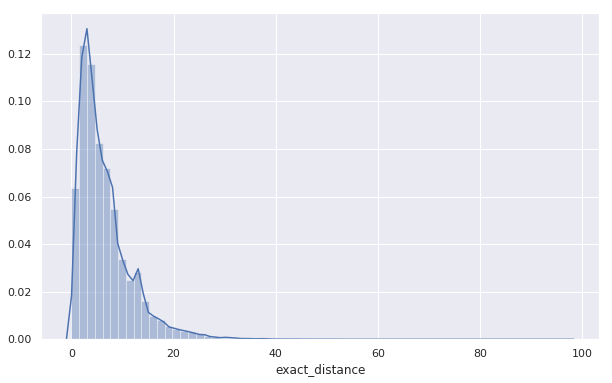

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot( df_features[df_features['exact_distance'] < 100]['exact_distance'], bins=64, 
             label='Distribution of Distances')


In [68]:
df_features.head()

,messageid,latitude,snr,longitude,rssi,bsid,freq,n,rssi_sent,C,longitude_bs,latitude_bs,exact_distance
0,5a604d76e541cd1c3371a44e,48.904072,22.559999,2.329444,-129,14280,868187433,1.016385,-56.095978,36.103017,2.343745,48.891944,1.708355
1,5aef766acf554f6aa92049d4,48.952637,14.320000,2.338200,-130,14280,868173153,1.016385,-56.095978,36.103017,2.343745,48.891944,6.761751
2,5ac54c7be541cd61b3678ec6,48.889890,36.029999,2.344724,-115,14280,868171186,1.016385,-56.095978,36.103017,2.343745,48.891944,0.239430
3,5b2fc371e541cd38459c5647,48.889420,8.900000,2.394806,-135,14280,868123602,1.016385,-56.095978,36.103017,2.343745,48.891944,3.754912
4,5af56993cf554f6aa95f5271,48.853516,10.130000,2.398216,-136,14280,868050537,1.016385,-56.095978,36.103017,2.343745,48.891944,5.850654


In [19]:
from multiprocessing import Pool

In [20]:
estimated_rssi_send = np.mean( df_features['rssi'].values + np.log(df_features['exact_distance'].values / df_features['d0'].values))
estimated_rssi_send

-126.1480578130591

In [80]:
def estim_dist(index_row):
    _, row = index_row
#     return row['d0'] * np.exp( (row['rssi_sent'] - row['rssi']) / (10 *  row['n'] ))
#     return 10 ** (row['rssi'] + 80) / (10e-2) 
#     return (10 ** (-(row['rssi'] - row['rssi_sent'])/ (10*row['n']))) / 1000
    rssi, rssi_0, n, freq, C = row['rssi'], row['rssi_sent'], row['n'], row['freq'], row['C']
    return (10 ** ((rssi_0 - rssi - 10* n * np.log10(freq / 1e6) + 30*n -C )/ (10*n))) /1000

In [81]:
%%time
estimated_distances = []

pool = Pool(30)

estimated_distances = pool.map(estim_dist, df_features.iterrows())

pool.close()
pool.join()
                               

# for index, row in df_features.iterrows():
#     dist = row['d0'] * np.exp(row['rssi'] / row['n'])
#     estimated_distances.append(dist)

df_features['estimated_distance'] = estimated_distances

CPU times: user 2min 25s, sys: 5.96 s, total: 2min 30s
Wall time: 2min 36s


In [79]:
df_features.sample(50).head(30)

,messageid,latitude,snr,longitude,rssi,bsid,freq,n,rssi_sent,C,longitude_bs,latitude_bs,exact_distance,estimated_distance
943461,5a626025e541cd1c33423923,48.886692,23.110001,2.202020,-128,2605,868114859,1.917823,-36.377034,16.392119,2.123600,48.941200,8.353685,9.0
519155,5b33370ee541cd384577122c,48.904072,7.380000,2.305398,-135,1264,868087081,1.608468,-45.433172,25.438492,2.343150,48.922183,3.422564,11.0
451070,5b1cd856e541cd3845cc489a,48.952110,14.400000,2.452490,-125,3570,868179022,1.810556,-38.280074,18.296235,2.384134,48.945736,5.056793,6.0
484187,5b0b294ae541cd05fdef2cc8,48.899722,17.030001,2.283889,-122,3581,868055401,1.418143,-45.219265,25.228565,2.294022,48.924447,2.848186,4.0
1008370,5ab4e9f0cf554f1334d4b25c,48.858917,18.440001,2.415244,-133,8509,868144242,1.123075,-55.944780,35.948127,2.405278,48.864722,0.975447,5.0
131475,5b27bfd8e541cd3845b46f75,49.027271,17.059999,2.592322,-119,4058,868142949,1.709106,-36.056961,16.069908,2.387723,48.901712,20.479712,9.0
714390,5a9e9763e541cd0b11e1fb19,48.806557,21.639999,2.314550,-129,3415,868143269,1.659983,-40.274113,20.282622,2.266078,48.765849,5.760234,15.0
185392,5af3455be541cd123fbeacba,48.815491,22.100000,2.519876,-83,3565,868120362,1.475146,-43.686007,23.696744,2.518250,48.812955,0.306205,0.0
437141,5aec4931cf554f6aa973a66a,48.931705,13.740000,2.319368,-124,3570,868111907,1.810556,-38.280074,18.296235,2.384134,48.945736,4.994814,6.0
680959,5ac394dde541cd61b3598354,48.870258,27.570000,2.296422,-124,4129,868147402,1.612477,-41.682716,21.690567,2.408611,48.855278,8.398495,6.0


In [82]:
import seaborn as sns

sns.set()

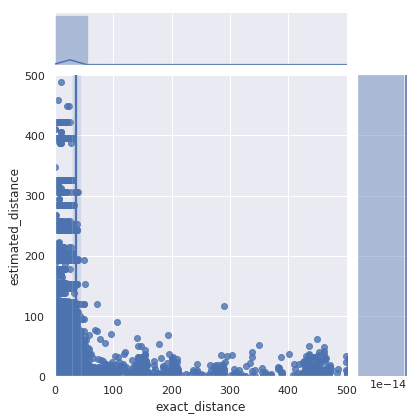

In [85]:
sns.jointplot(data=df_features, x='exact_distance', y='estimated_distance', kind='reg',
              xlim=(0, 500), ylim=(0, 500))

### Findind d0 as


$$ estimated_{distance} = d_0 \times exact_{distance} $$



In [86]:
from scipy.stats import linregress

In [87]:
%%time
reg_res = linregress(df_features['exact_distance'], df_features['estimated_distance'])

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 21.7 ms


In [88]:
print(reg_res)

LinregressResult(slope=-98841964.9986058, intercept=3664325315.4181924, rvalue=-0.0006088900886847827, pvalue=0.5217145068201221, stderr=154270634.97890747)


In [27]:
df_features['estimated_distance_corrected'] = df_features['estimated_distance'] * reg_res.slope 

CPU times: user 3h 31min 13s, sys: 4h 22min 47s, total: 7h 54min
Wall time: 21min 48s


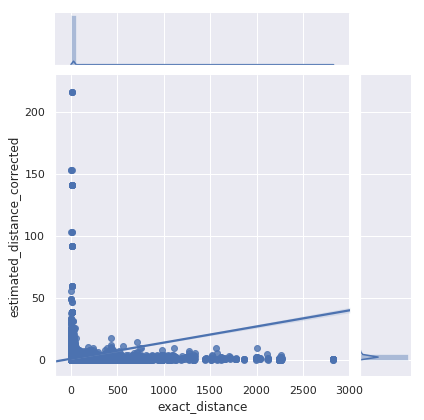

In [28]:
%%time
sns.jointplot(data=df_features[df_features['estimated_distance'] <= 3000],
             x='exact_distance', y='estimated_distance_corrected', kind='reg')

In [34]:
df_features.shape#, train_df.shape

(11072333, 13)

In [36]:
mlp_distances = np.loadtxt('data/Train/mlp_dist.txt')

mlp_distances.shape, mlp_distances

((11072333,),
 array([6.12318134, 6.30771923, 3.77674818, ..., 3.61314583, 3.62426424,
        3.62426424]))

In [37]:
train_df['estim_distance'] = mlp_distances
train_df['latitude_bs'] = df_features['latitude_bs']
train_df['longitude_bs'] = df_features['longitude_bs']

train_df.to_parquet('data/Train/train_dataset_withdistMLP.parquet')

## Validation

In [ ]:
%%time
test_df = pd.read_csv('data/Validation/test_dataset.csv', sep=',')

test_features = test_df[['messageid', 'rssi', 'bsid','freq']].merge(df_bs_tot, on='bsid')

estimated_distances = []

pool = Pool(30)

estimated_distances = pool.map(estim_dist, test_features.iterrows())

pool.close()
pool.join()
                               

# for index, row in df_features.iterrows():
#     dist = row['d0'] * np.exp(row['rssi'] / row['n'])
#     estimated_distances.append(dist)

# test_features['estimated_distance'] = estimated_distances

In [40]:
mlp_val_distances = np.loadtxt('data/Validation/mlp_dist.txt')

test_df.shape, mlp_val_distances.shape

((523842, 22), (523842,))

In [45]:
test_features.columns

Index(['messageid', 'rssi', 'bsid', 'freq', 'n', 'rssi_sent', 'C', 'lng',
       'lat'],
      dtype='object')

In [46]:
test_df['estim_distance'] = mlp_val_distances
test_df['latitude_bs'] = test_features['lat']
test_df['longitude_bs'] = test_features['lng'] 

test_df.to_parquet('data/Validation/test_dataset_withdistMLP.parquet')